# Let's get to training!

## If you have not generated the training data, either run the code from the command line, or go to simulate_interactive.ipynb for  interactive data generation. This notebook details the training of the CNN. Let us start with the imports


In [2]:
import tensorflow as tf
from Nets.Training import *
from Core.LoadTrainingData import DataLoader
from Nets.CNN1D import *
import matplotlib.pyplot as plt , numpy as np

#Let's check if a gpu is available. If the list is not empty, we have a gpu on board! :D
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
if gpus:
	try:
		tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=6048)])
	except RuntimeError as e:
		print(e)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## First, we need to load our training and validation dataset, which we simulated in simulate_interactive.ipynb. Provide the path to both:


In [3]:
training_data   = r'Data\simulated\Train'
validation_data = r'Data\simulated\Val'

## We load the data as follows:

100%|██████████| 5/5 [00:01<00:00,  4.02it/s]


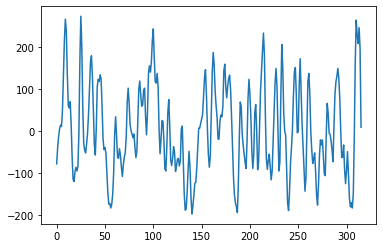

In [4]:
Train_data_loader = DataLoader(training_data)
Val_data_loader = DataLoader(validation_data)

X_Data, Y_Data = Train_data_loader.load_data()
X_Data_val, Y_Data_val = Val_data_loader.load_data()

plt.plot(np.squeeze(X_Data[np.random.randint(0,X_Data.shape[0]),:]))


## Now that the data is loaded, we can instantiate the model. First we define the save path for model weights and architecture

In [5]:
save_path = r'Models/test_train'

## Now, we instantiate the model and save the architecture to json

In [6]:
model =CNN1D((Train_data_loader.params['FragmentSize'],1))


json_config = model.to_json()
with open(os.path.join(save_path,'model-Architecture.json' ), "w") as json_file:
	json_file.write(json_config)

## We can now define the callbacks and compile the model

In [7]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
# training_loop = TrainModel(model)
model.compile(optimizer=opt, loss = 'bce')
# model.load_weights(os.path.join(save_path, 'modelBestLoss.hdf5'))
save_metriccallb = SaveMetrics(save_path)
save_modelcallb  = SaveBestModel(save_path)

## With everything ready, it is time to fit our model! The training is run for 20 epochs, and model weights at lowest validation loss throughout the training are stored:

In [8]:
model.fit(x = X_Data,y = Y_Data,validation_data = (X_Data_val,Y_Data_val), batch_size = 32, epochs=30, verbose = 1,callbacks = [save_metriccallb,save_modelcallb])


Epoch 1/30
73188/73188 [==============================] - 9423s 129ms/step - loss: 0.2443 - val_loss: 0.1586
Epoch 2/30
73188/73188 [==============================] - 9482s 130ms/step - loss: 0.1353 - val_loss: 0.1148
Epoch 3/30
 1928/73188 [..............................] - ETA: 2:27:31 - loss: 0.1089